# House Pricing in Australia by Surprise Housing

## Problem Statement 

Surprise Housing is looking at prospective properties to buy to enter the housing market in Australia.
Purpose of this project is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

and also the optimal value of lambda for ridge and lasso regression.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing the essential libraries and ignoring the warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)# Setting option to display all the columns in dataset
pd.set_option('display.max_rows', 300)# Setting option to display 300 rows in dataset

In [3]:
# Using ggplot
plt.style.use('ggplot') 

## Importing Dataset

In [4]:
df = pd.read_csv("train.csv")

## Data Cleaning, Manipulation and Exploration

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Checking Missing values

In [8]:
import missingno as mno

<AxesSubplot:>

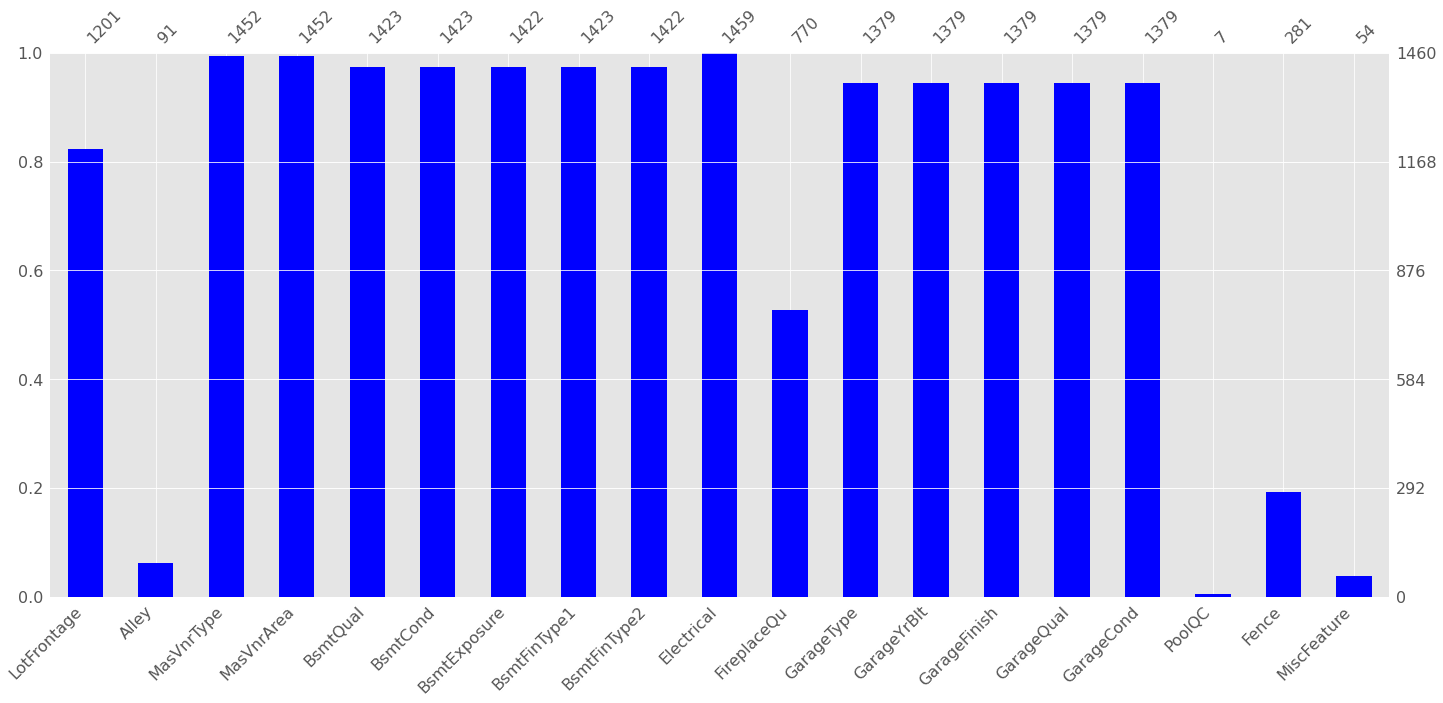

In [9]:
mno.bar(df[df.columns[df.isna().any()]],color ='blue')

### Missing number Percentage

In [10]:
null_data = df.columns[df.isnull().any()]

In [11]:
null_values= df[null_data].isnull().sum().sort_values(ascending=False)

In [12]:
null_perc=(df[null_data].isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

In [13]:
null_df = pd.concat([null_values,null_perc],axis=1,keys=["Count","Perc"])

In [14]:
null_df

,Count,Perc
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


### Dropping the columns with missing value greater than 15%

In [15]:
null_df[null_df["Perc"]>15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [16]:
df.drop(null_df[null_df["Perc"]>15].index, axis = 1,inplace=True)

In [17]:
df.shape

(1460, 75)

In [18]:
null_df= null_df[null_df["Perc"]<15]

### Imputing the Missing values for columns with null perc less than 15.

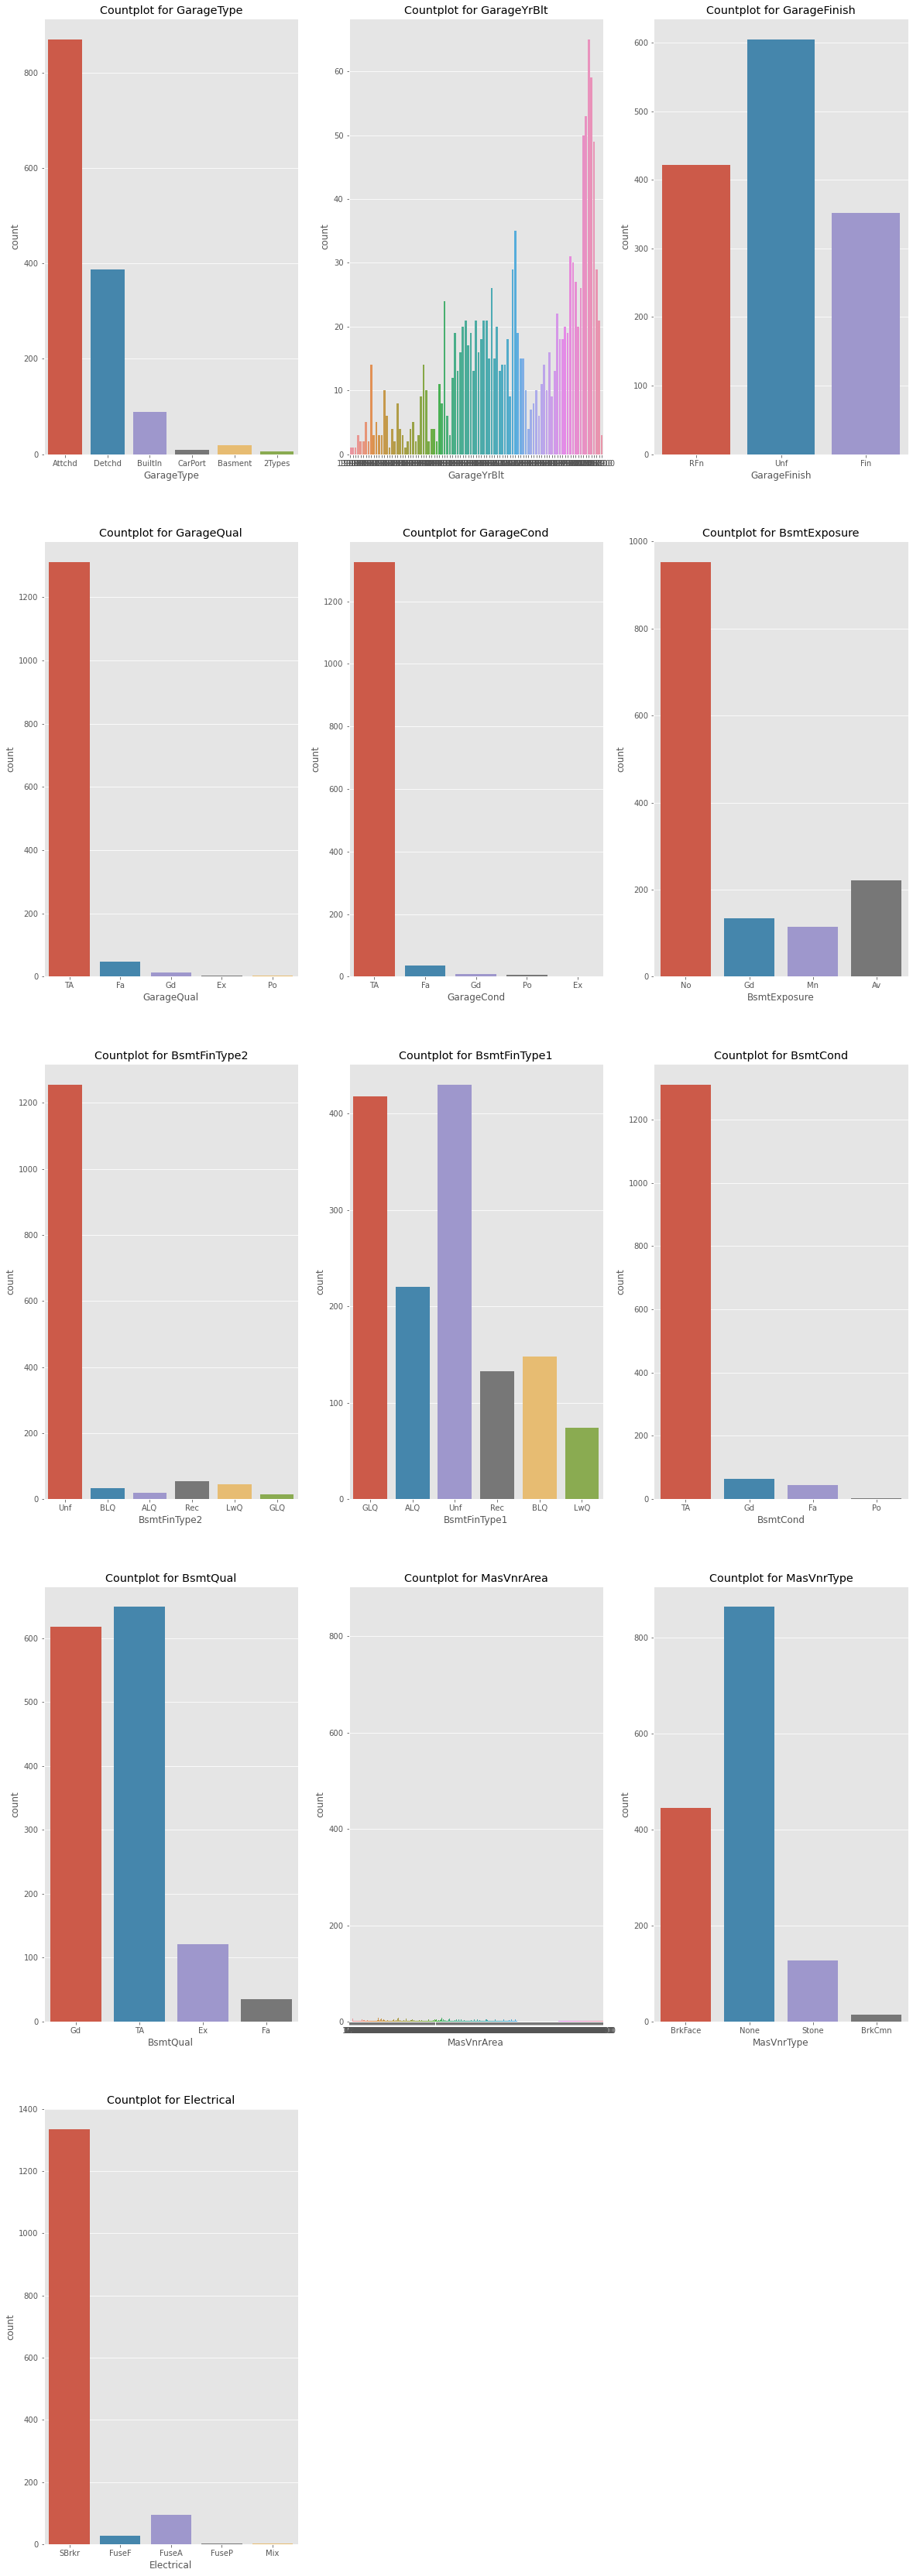

In [19]:
plt.figure(figsize=[20, 60])

for i , var in enumerate (null_df.index,start=1):
    plt.subplot(5,3,i)
    sns.countplot(df[var])
    plt.title(f"Countplot for {var}")       

#### Impute "GarageType" - Garage location
GarageType is a meaningful value "NA" that can impact the house pricing
Hence we replace the missing variable with "NA"

In [20]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [21]:
df["GarageType"].isna().value_counts()

False    1379
True       81
Name: GarageType, dtype: int64

In [22]:
df["GarageType"].fillna(value = "NA",inplace=True)

#### Impute "GarageYrBlt" - Year garage was built.
This is a numerical variable hence imputing "GarageYrBlt" with its median value

In [23]:
df["GarageYrBlt"].median()

1980.0

In [24]:
df["GarageYrBlt"].fillna(value = df["GarageYrBlt"].median(),inplace=True)

#### Imputing "GarageFinish" -Interior finish of the garage
GarageFinish is a meaningful value "NA" that can impact the house pricing
Hence we replace the missing variable with "NA"

In [25]:
df["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [26]:
df["GarageFinish"].isna().value_counts()

False    1379
True       81
Name: GarageFinish, dtype: int64

In [27]:
df["GarageFinish"].fillna(value = "NA",inplace=True)

#### Imputing GarageQual: Garage quality
Garage quality is a meaningful value "NA" that can impact the house pricing
Hence we replace the missing variable with "NA"

In [28]:
df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [29]:
df["GarageQual"].isna().value_counts()

False    1379
True       81
Name: GarageQual, dtype: int64

In [30]:
df["GarageQual"].fillna(value = "NA",inplace=True)

#### Imputing GarageCond: Garage condition
GarageCond is a meaningful value "NA" that can impact the house pricing
Hence we replace the missing variable with "NA"

In [31]:
df["GarageCond"].isna().value_counts()

False    1379
True       81
Name: GarageCond, dtype: int64

In [32]:
df["GarageCond"].fillna(value = "NA",inplace=True)

#### Imputing Basement Features 
'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'
have  meaningful value "NA" that can impact the house pricing
Hence we replace the missing variable with "NA"

In [33]:
bsmtft = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

In [34]:
for i in bsmtft:
    df[i].fillna(value = "NA",inplace=True)
    NA = df[i].isna().value_counts()
    print (NA)
    

False    1460
Name: BsmtExposure, dtype: int64
False    1460
Name: BsmtFinType2, dtype: int64
False    1460
Name: BsmtFinType1, dtype: int64
False    1460
Name: BsmtCond, dtype: int64
False    1460
Name: BsmtQual, dtype: int64


#### Imputing Electrical - Electrical: Electrical system
Electrical: Electrical system is imputed with its mode value since it does not have a meaning full missing value 

In [35]:
df["Electrical"].isna().value_counts()

False    1459
True        1
Name: Electrical, dtype: int64

In [36]:
df["Electrical"].mode()[0]

'SBrkr'

In [37]:
df["Electrical"].fillna(value = df["Electrical"].mode()[0] ,inplace=True)

#### Imputing MasVnrType: Masonry veneer type
with  meaningful value "NA" that can impact the house pricing
Hence we replace the missing variable with "NA"

In [38]:
df["MasVnrType"].isna().value_counts()

False    1452
True        8
Name: MasVnrType, dtype: int64

In [39]:
df["MasVnrType"].fillna(value = "None",inplace=True)

#### Imputing MasVnrArea with the median area

In [40]:
df["MasVnrArea"].median()

0.0

In [41]:
df["MasVnrArea"].fillna(value = df["MasVnrArea"].median(),inplace=True)

#### checking for no null values in the dataset

In [42]:
null_data1 = df.columns[df.isnull().any()]

In [43]:
null_values1= df[null_data1].isnull().sum().sort_values(ascending=False)

In [44]:
null_perc1=(df[null_data1].isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

In [45]:
null_df1 = pd.concat([null_values1,null_perc1],axis=1,keys=["Count","Perc"])

In [46]:
null_df1 

,Count,Perc


### Removing least important columns

In [47]:
for i in df.columns:
    print (df[i].value_counts())
    

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int6

#Removing the variables with low variance.
From the above analysis, the below list of low variance column can be removed.

In [48]:
low_var = ["Street",'Utilities','Condition2','Heating','PoolArea',
           'ScreenPorch','LowQualFinSF','RoofMatl','MiscVal','3SsnPorch']

In [49]:
for i in low_var:
    df.drop(columns= i, inplace=True)

In [50]:
# Dropping "Id" column as it's not essential
df.drop(columns='Id', inplace=True)

In [51]:
df.shape

(1460, 64)

### Handling Year columns

There are 4 Year Columns. 
Let us create Age columns in year and remove these columns.
<br> Age is calculated by subtracting the Year from the current Year for each column.
- YearBuilt
- YearRemodAdd
- GarageYrBlt
- YrSold

In [52]:
cy = 2022

In [53]:
df['Age_Built_Years'] = cy - df['YearBuilt']

In [54]:
df['Age_YearRemodAdd'] = cy - df['YearRemodAdd']

In [55]:
df['Age_GarageYrBlt'] = cy - df['GarageYrBlt']

In [56]:
df['Age_YrSold'] = cy - df['YrSold']

In [57]:
# Droppng the year columns
df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)

In [58]:
df.shape

(1460, 64)

## Analysing the Target Variable - SalePrice

<Figure size 1440x1296 with 0 Axes>

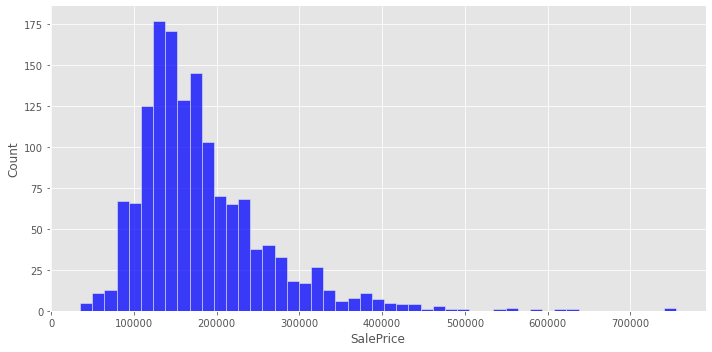

In [59]:
plt.figure(figsize=[20,18])
sns.displot(df['SalePrice'], aspect=2,color = "blue")
plt.show()

It is observed that the SalePrice is skewd towards right indicating outliers with high saleprice.
Since Linear regression models are interapolation models and not extraploation, we cannot cap the valuss.

### Skewness and Kurtosis

In [60]:
df['SalePrice'].skew()

1.8828757597682129

The rule of thumb for checking skewness:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed

If the skewness is less than -1 or greater than 1, the data are highly skewed

It is greater than 1 in SalePrice, so it is highly skewed

In [61]:
df['SalePrice'].kurtosis()

6.536281860064529


kurtosis is the measure of the tail-heaviness of the distribution
For a normal distribution, kurtosis value is 3

- As kurtosis value increase, the tail heaviness also increases and vice-versa

- In our case as the kurtosis value is more than ~6.5, distribution tail is heavier

#### Handling SalePrice high skewness and kurtosis

Log Transaformation will be used to transform the value into normal distribution, which in turn reduces the skewness.

<Figure size 1440x1080 with 0 Axes>

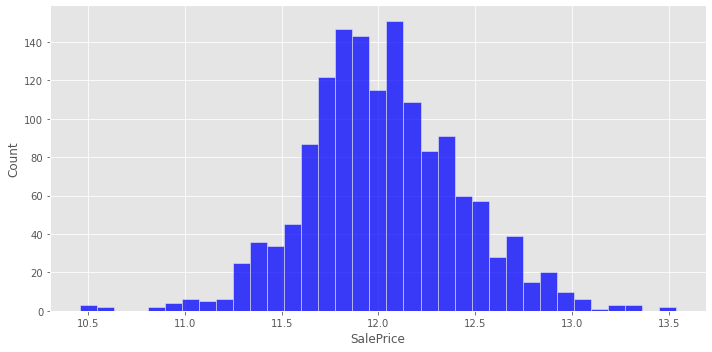

In [62]:
# Plotting distribution of a log transformed "SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(np.log(df['SalePrice']), aspect=2,color="blue")
plt.show()

In [63]:
# Create Log Transformed "SalePrice" column
df['Transformed_SalePrice'] = np.log(df['SalePrice'])

<Figure size 1440x1080 with 0 Axes>

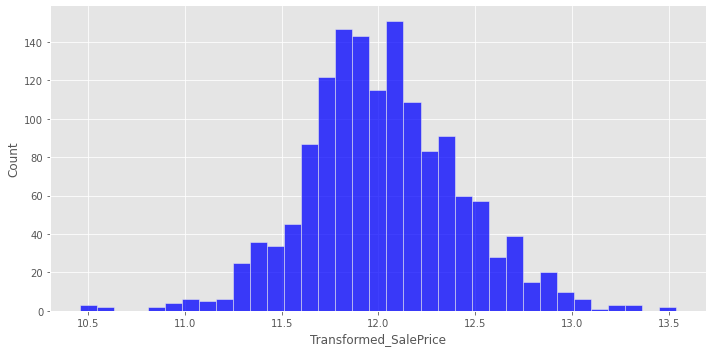

In [64]:
# Plotting distribution of a "Transformed_SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(df['Transformed_SalePrice'], aspect=2,color = "blue")
plt.show()

In [65]:
df.shape

(1460, 65)

In [66]:
df

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,Age_Built_Years,Age_YearRemodAdd,Age_GarageYrBlt,Age_YrSold,Transformed_SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,2,WD,Normal,208500,19,19,19.0,14,12.247694
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,5,WD,Normal,181500,46,46,46.0,15,12.109011
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,9,WD,Normal,223500,21,20,21.0,14,12.317167
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,2,WD,Abnorml,140000,107,52,24.0,16,11.849398
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,12,WD,Normal,250000,22,22,22.0,14,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,5,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,Ex,Y,SBrkr,953,694,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,TA,Y,0,40,0,8,WD,Normal,175000,23,22,23.0,15,12.072541
1456,20,RL,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,6,Gable,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,TA,Y,SBrkr,2073,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,TA,Y,349,0,0,2,WD,Normal,210000,44,34,44.0,12,12.254863
1457,70,RL,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,7,9,Gable,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,Ex,Y,SBrkr,1188,1152,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,TA,Y,0,60,0,5,WD,Normal,266500,81,16,81.0,12,12.493130
1458,20,RL,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,5,6,Hip,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gd,Y,FuseA,1078,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,Unf,1,240,TA,TA,Y,366,0,112,4,WD,Normal,142125,72,26,72.0,12,11.864462


## Exploratory Data Analysis

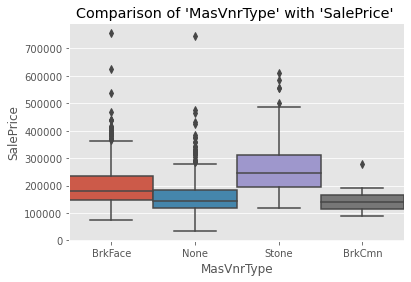

In [67]:
var = 'MasVnrType'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Observation -  Stone Has high median value in Masonry Veneer Type

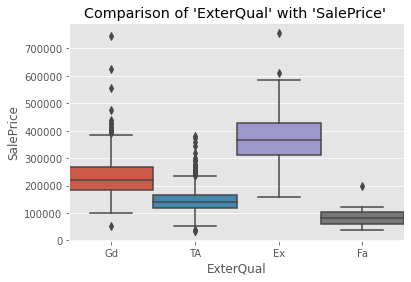

In [68]:
var = 'ExterQual'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Observation - Excellent Quality iof Exterior has highest median value

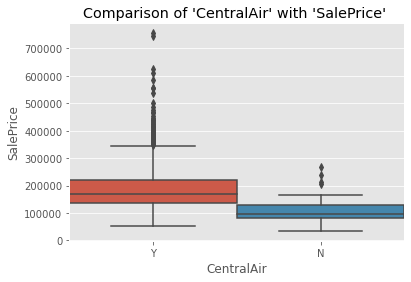

In [69]:
var = 'CentralAir'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Houses with Central Air conditioning have a higher median price compared to the houses that don't have Central Air conditioning

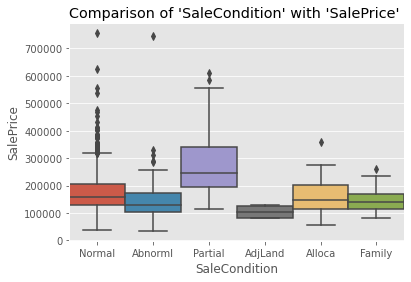

In [70]:
var = 'SaleCondition'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Houses that are partially completed have a higher median Saleprice compared to other categories. This might be because partially completed houses are usually new houses under construction.

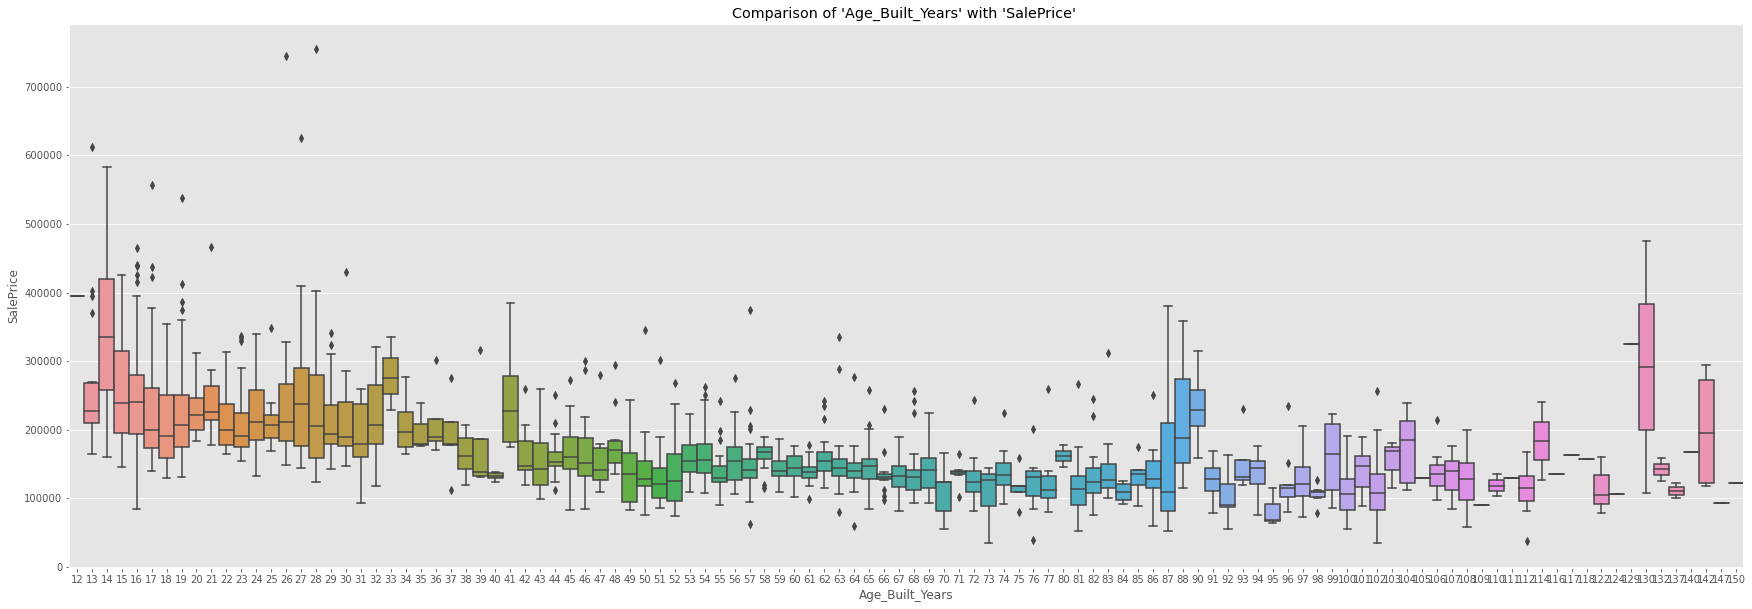

In [71]:
plt.figure(figsize=[30,10])
var = 'Age_Built_Years'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

As the house age increases, we can see that the median SalePrice drops but there are few cases where the SalePrice goes up as well

### Correlation matrix and heatmap

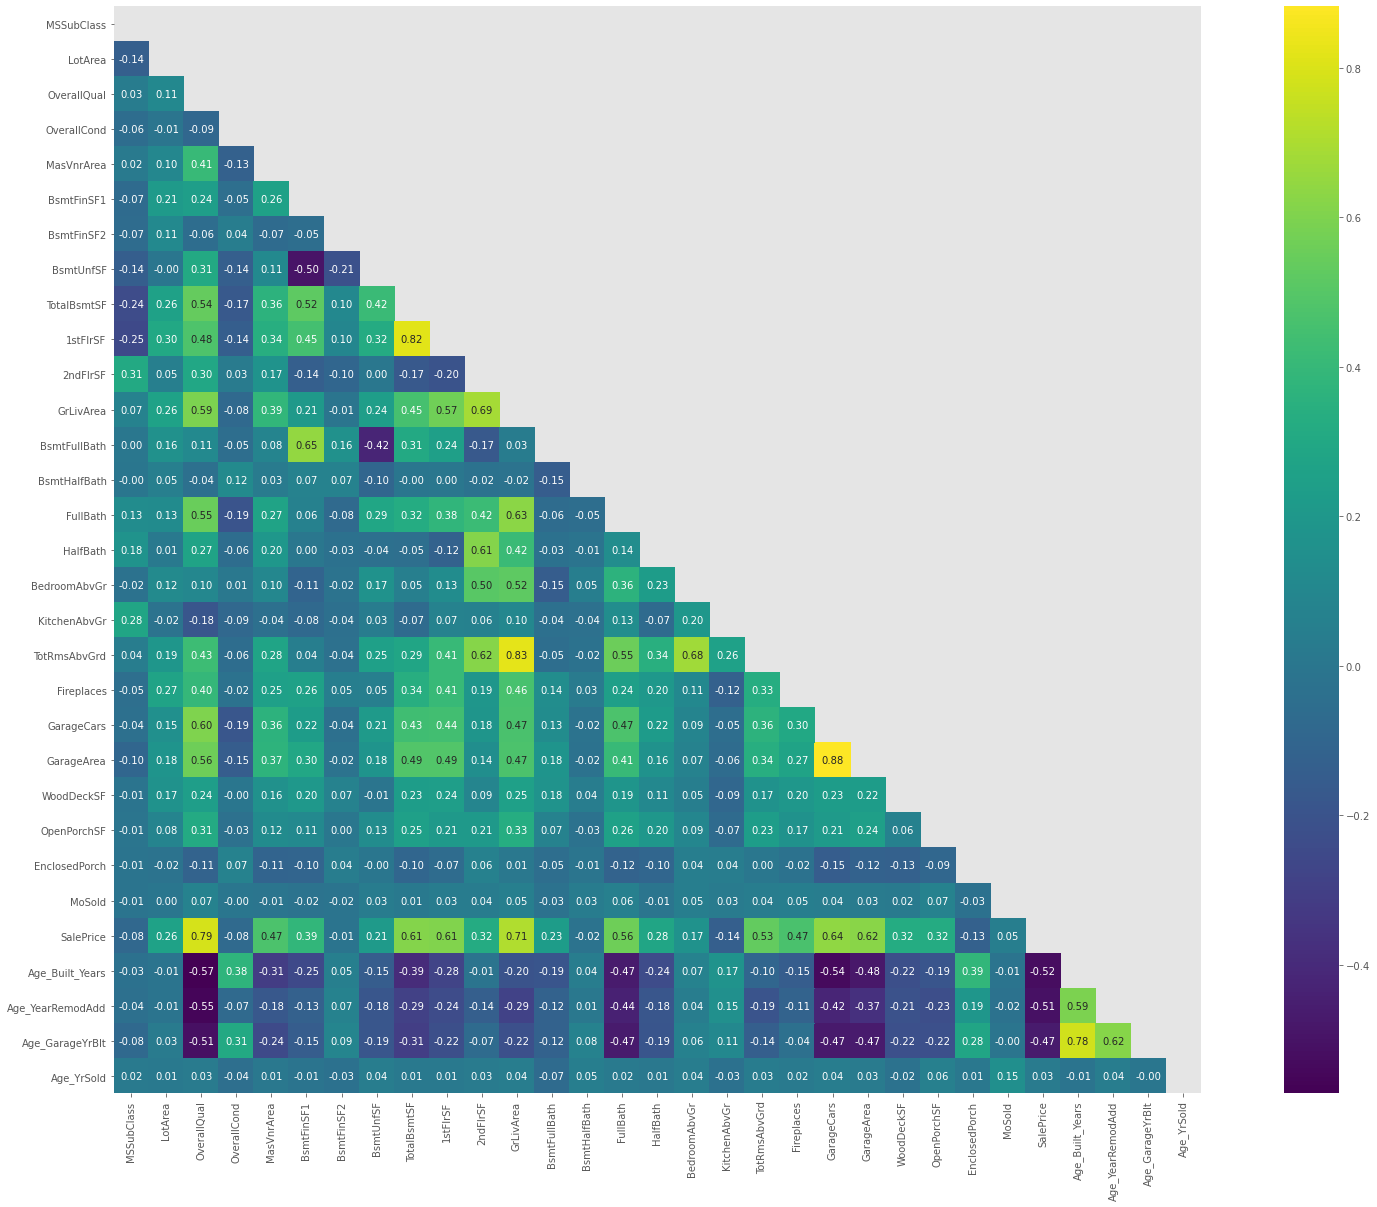

In [72]:
plt.figure(figsize=[30,20])
corr = df.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) # Masking upper half of the triangle
sns.heatmap(corr, cmap='viridis', annot=True, fmt='.2f', square=True, mask=mask)
plt.show()

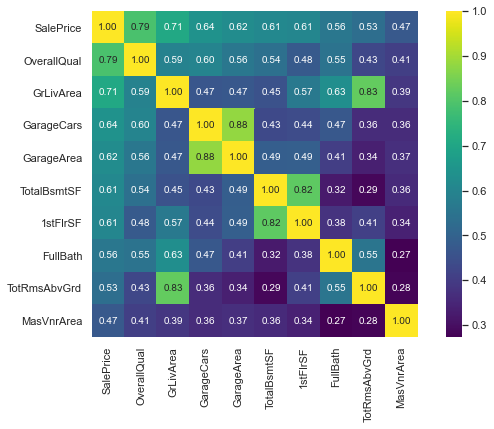

In [73]:
plt.figure(figsize=[10,6])

k = 10 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='viridis')
plt.show()

Observation - 
The below fields are highly correlated -

- GarageArea and GarageCars - 0.88
- GRLivArea and TotRmsAbvGrd - 0.83
- TotalBsmtSF and 1stFlrSF - 0.82
- OverallQual and SalePrice - 0.79

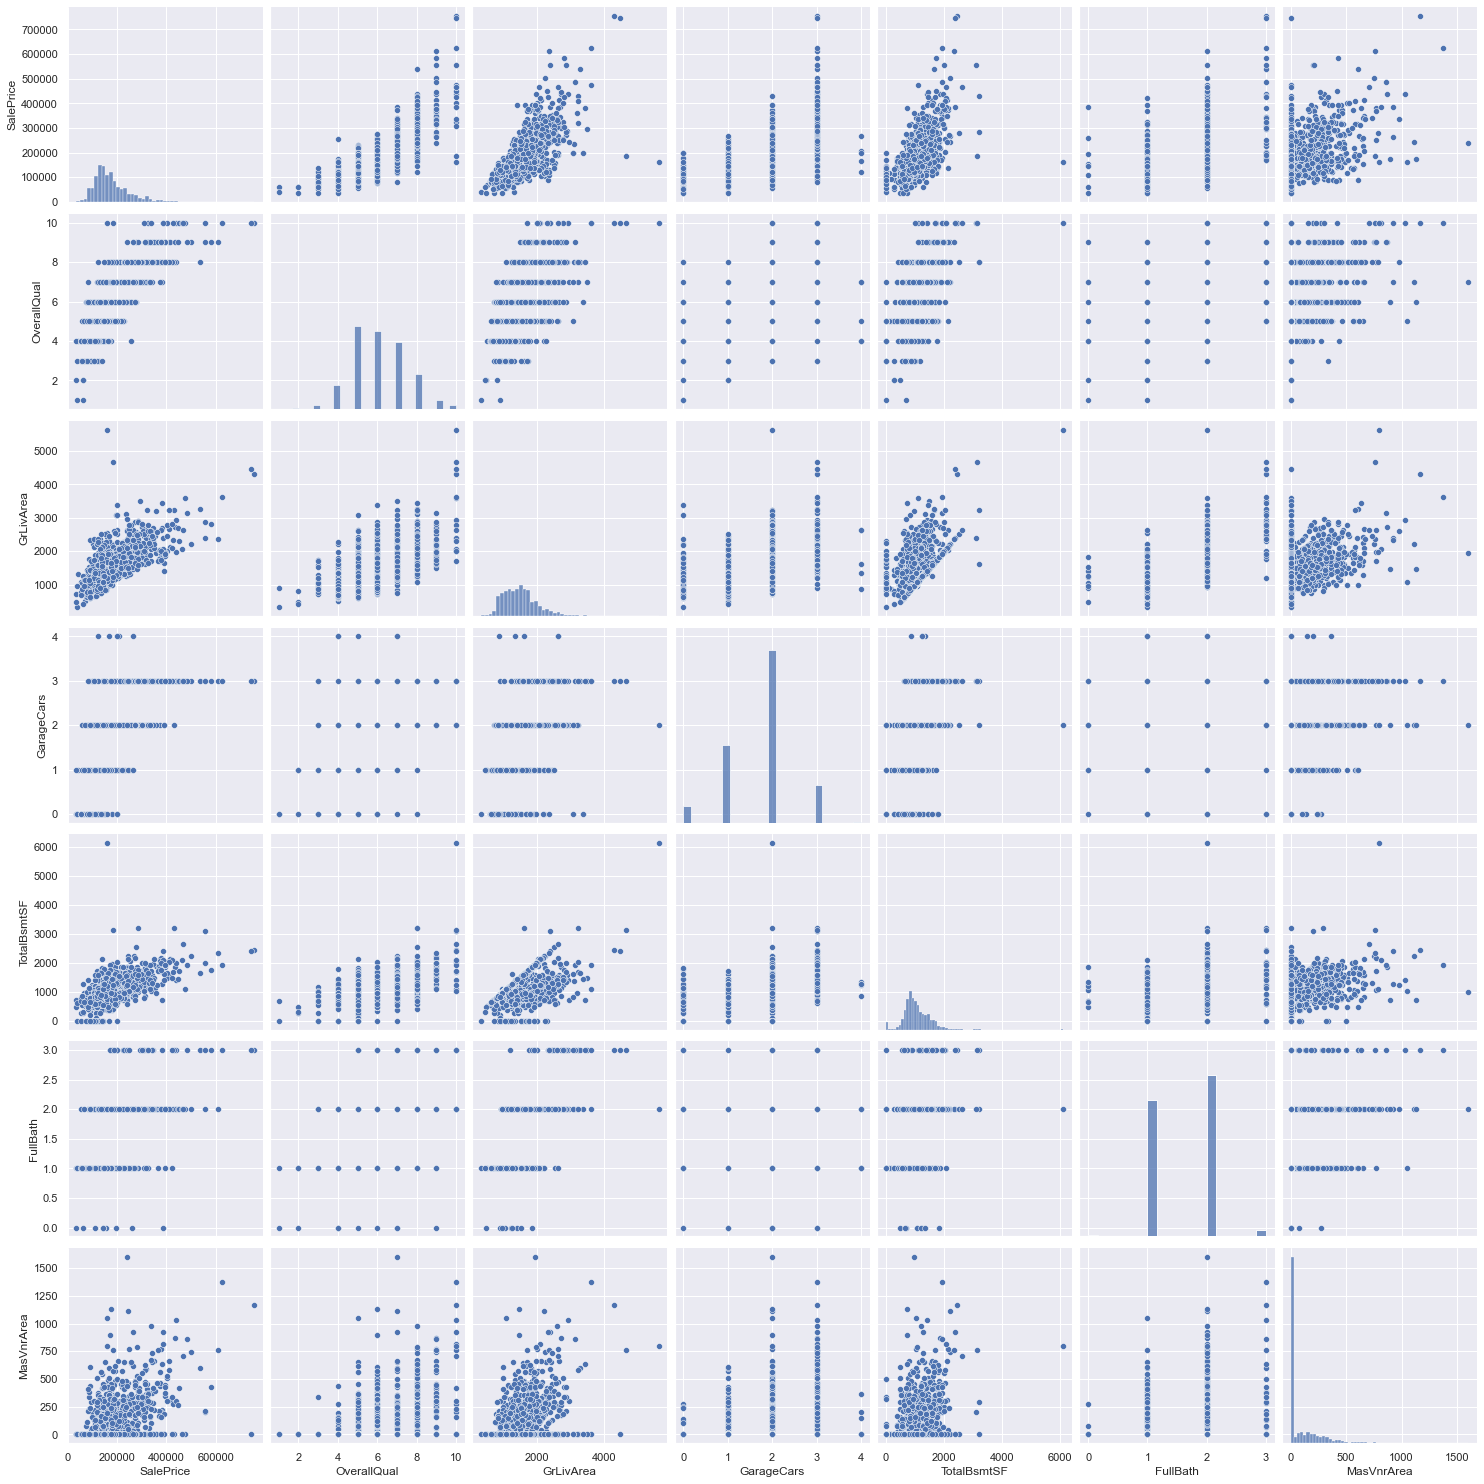

In [74]:
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(df[cols], size=3)
plt.show()

Observation 
- TotalBasementSF, GrLivingArea & OverallQual are linearly correlated with SalePrice
- TotalBasementSF and GrLivingArea have a positive correlation
- Distribution of MasVnrArea is skewed to the right

## Data Preparation

In [75]:
cat_var = df.select_dtypes(include='object').columns
print(len(cat_var))

33


### OHE (One-Hot Encoding) for Categorical Columns

In [76]:
df_categorical = df.select_dtypes(include ='object')

In [77]:
df_categorical.columns.shape

(33,)

In [78]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)

In [79]:
df_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [80]:
df.drop(list(df_categorical.columns),axis=1,inplace=True)

In [81]:
df.shape

(1460, 32)

In [82]:
df = pd.concat([df,df_dummies],axis=1)

In [83]:
df.head().T

,0,1,2,3,4
MSSubClass,60.000000,20.000000,60.000000,70.000000,60.000000
LotArea,8450.000000,9600.000000,11250.000000,9550.000000,14260.000000
OverallQual,7.000000,6.000000,7.000000,7.000000,8.000000
OverallCond,5.000000,8.000000,5.000000,5.000000,5.000000
MasVnrArea,196.000000,0.000000,162.000000,0.000000,350.000000
BsmtFinSF1,706.000000,978.000000,486.000000,216.000000,655.000000
BsmtFinSF2,0.000000,0.000000,0.000000,0.000000,0.000000
BsmtUnfSF,150.000000,284.000000,434.000000,540.000000,490.000000
TotalBsmtSF,856.000000,1262.000000,920.000000,756.000000,1145.000000
1stFlrSF,856.000000,1262.000000,920.000000,961.000000,1145.000000


In [84]:
df.shape

(1460, 216)

### Splitting the data

In [85]:
X = df.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = df['Transformed_SalePrice']

In [86]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Age_Built_Years,Age_YearRemodAdd,Age_GarageYrBlt,Age_YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,2,19,19,19.0,14,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,5,46,46,46.0,15,0,0,1,0,0,0,1,0,0

In [87]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Transformed_SalePrice, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split #Importing Test-Train Split 

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [90]:
print(X_train.shape)
print(y_train.shape)

(1021, 214)
(1021,)


In [91]:
print(X_test.shape)
print(y_test.shape)

(438, 214)
(438,)


In [92]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 216 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1460 non-null   int64  
 1    LotArea                1460 non-null   int64  
 2    OverallQual            1460 non-null   int64  
 3    OverallCond            1460 non-null   int64  
 4    MasVnrArea             1460 non-null   float64
 5    BsmtFinSF1             1460 non-null   int64  
 6    BsmtFinSF2             1460 non-null   int64  
 7    BsmtUnfSF              1460 non-null   int64  
 8    TotalBsmtSF            1460 non-null   int64  
 9    1stFlrSF               1460 non-null   int64  
 10   2ndFlrSF               1460 non-null   int64  
 11   GrLivArea              1460 non-null   int64  
 12   BsmtFullBath           1460 non-null   int64  
 13   BsmtHalfBath           1460 non-null   int64  
 14   FullBath               1460 non-null  

### Applying MinMax scalar on numerical columns

In [93]:
num_var = X_train.select_dtypes(include=['int64', 'float64']).columns
print(len(num_var))
num_var

30


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'Age_Built_Years', 'Age_YearRemodAdd',
       'Age_GarageYrBlt', 'Age_YrSold'],
      dtype='object')

In [94]:
# Import library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
sc = MinMaxScaler()

# Perform fit and transform on the train dataset
X_train[num_var] = sc.fit_transform(X_train[num_var])

# Perform only transform on the test dataset
X_test[num_var] = sc.transform(X_test[num_var])

In [95]:
print(X_train.shape)
print(X_test.shape)

(1021, 214)
(438, 214)


## Linear Regression Model

### Base Model

In [96]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [97]:
# Base Model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [98]:
# Checking co-efficients for all features
coeff = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-3.947516e-02
LotArea,2.335864e-01
OverallQual,4.507442e-01
OverallCond,2.381215e-01
MasVnrArea,-6.176277e-02
BsmtFinSF1,4.467761e+11
BsmtFinSF2,8.921273e+10
BsmtUnfSF,1.849165e+11
TotalBsmtSF,-4.836644e+11
1stFlrSF,-9.061069e-01


In [99]:
# Checking the Intercept
reg.intercept_

10.64038219435801

In [100]:
# Making predictions on test data using the model
y_pred = reg.predict(X_test)

In [101]:
# Showing actual and predicted values
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
892,11.947949,11.925484
1105,12.691580,12.751459
413,11.652687,11.534455
522,11.976659,12.121955
1036,12.661914,12.738660
...,...,...
331,11.842229,11.771683
323,11.745425,11.736386
650,12.235389,12.280011
439,11.608236,11.703063


In [102]:
X_train.shape

(1021, 214)

In [103]:
X_test.shape

(438, 214)

In [104]:
# Import r2_score and mean squared error from library
from sklearn.metrics import r2_score, mean_squared_error

In [105]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9224895234192264
Test r2 score is : -3.3605877358143796e+16
Train RSS score is : 12.278770393809964
Test RSS score is : 2.4970853981968287e+18
Train MSE score is : 0.012026219778462256
Test MSE score is : 5701108215061253.0


The above score between train and test show that the model is apparently overfitting.
Train scores seem good but model is performing bad in test data.

In order to overcome this we can use RFE and reduce the column numbers to 50 and remove coumns with high VIF

## Model 1 - LR with RFE


In [106]:
# Importing RFE from library
from sklearn.feature_selection import RFE

In [107]:
# Instantiating a LinearRegression object
lr = LinearRegression()
lr.fit(X_train,y_train)

# RFE
rfe = RFE(lr,50)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [108]:
# Checking list of selections and ranking of each variable by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 103),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 4),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 90),
 ('FullBath', False, 67),
 ('HalfBath', False, 55),
 ('BedroomAbvGr', False, 41),
 ('KitchenAbvGr', False, 98),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 65),
 ('WoodDeckSF', False, 43),
 ('OpenPorchSF', False, 137),
 ('EnclosedPorch', True, 1),
 ('MoSold', False, 85),
 ('Age_Built_Years', True, 1),
 ('Age_YearRemodAdd', True, 1),
 ('Age_GarageYrBlt', False, 46),
 ('Age_YrSold', False, 146),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 115),
 ('LotShape_IR3', True, 1),
 ('LotSha

In [109]:
# Looking at the 50 variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'EnclosedPorch', 'Age_Built_Years', 'Age_YearRemodAdd', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'BldgType_Twnhs', 'HouseStyle_2.5Unf',
       'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Wd Sdng',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA',
       'BsmtCond_NA', 'BsmtFinType1_NA', 'BsmtFinType2_NA', 'HeatingQC_Po',
       'Functional_Maj2', 'Functional_Sev', 'GarageType_NA', 'GarageCond_Fa',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_Oth',
       'SaleCondition_Alloca'],
      dtype='object')

In [110]:
# Looking at the variables which were NOT selected by RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'BsmtFinSF2', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF',
       ...
       'PavedDrive_Y', 'SaleType_CWD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=164)

In [111]:
# Creating a dataframe "X_train_rfe" with variables selected by RFE
X_train_rfe = X_train[col]

In [112]:
X_train_rfe.shape

(1021, 50)

In [113]:
# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [115]:
X_train_new = build_model(X_train_rfe,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.889
Model:                               OLS   Adj. R-squared:                  0.884
Method:                    Least Squares   F-statistic:                     165.9
Date:                   Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                           01:08:09   Log-Likelihood:                 625.07
No. Observations:                   1021   AIC:                            -1154.
Df Residuals:                        973   BIC:                            -917.6
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [116]:
HighVIF = checkVIF(X_train_new)

In [117]:
HighVIF[ HighVIF['VIF'] >=5 ] # Features with VIF>=5

,Features,VIF
39,BsmtCond_NA,inf
40,BsmtFinType1_NA,inf
41,BsmtFinType2_NA,inf
37,BsmtQual_NA,inf
0,const,445.64
10,GrLivArea,148.45
9,2ndFlrSF,103.31
8,1stFlrSF,84.79
20,MSZoning_RL,49.70
21,MSZoning_RM,38.35


In [118]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)

In [119]:
len(highVIF_columns)

17

In [120]:
highVIF_columns.remove('const')

In [121]:
len(highVIF_columns)

16

In [122]:
highVIF_columns

['BsmtCond_NA',
 'BsmtFinType1_NA',
 'BsmtFinType2_NA',
 'BsmtQual_NA',
 'GrLivArea',
 '2ndFlrSF',
 '1stFlrSF',
 'MSZoning_RL',
 'MSZoning_RM',
 'TotalBsmtSF',
 'MSZoning_FV',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'BsmtQual_TA',
 'Age_Built_Years',
 'BsmtQual_Gd']

In [123]:
X_train_rfe.drop(highVIF_columns, axis=1, inplace=True) #Dropping the columns with high VIF in the train set

In [124]:
X_train_rfe.shape

(1021, 34)

In [125]:
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageCars,EnclosedPorch,Age_YearRemodAdd,MSZoning_RH,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Crawfor,Neighborhood_NPkVill,Neighborhood_NridgHt,Neighborhood_StoneBr,BldgType_Twnhs,HouseStyle_2.5Unf,Exterior1st_Wd Sdng,Exterior2nd_Brk Cmn,Exterior2nd_Wd Sdng,BsmtQual_Fa,HeatingQC_Po,Functional_Maj2,Functional_Sev,GarageType_NA,GarageCond_Fa,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Alloca
135,0.000000,0.042534,0.666667,0.625,0.000000,0.416667,0.333333,0.50,0.0,0.666667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1452,0.941176,0.011101,0.444444,0.500,0.333333,0.250000,0.000000,0.50,0.0,0.083333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
762,0.235294,0.034308,0.666667,0.500,0.000000,0.416667,0.000000,0.50,0.0,0.016667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
932,0.000000,0.048470,0.888889,0.500,0.000000,0.500000,0.333333,0.75,0.0,0.066667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
435,0.235294,0.043782,0.666667,0.625,0.333333,0.333333,0.333333,0.50,0.0,0.233333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Final Model - with 34 features

In [126]:
# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                   10.918200
MSSubClass              -0.134959
LotArea                  0.631487
OverallQual              1.051558
OverallCond              0.078300
BsmtFullBath             0.248375
TotRmsAbvGrd             0.551252
Fireplaces               0.207255
GarageCars               0.412702
EnclosedPorch           -0.045398
Age_YearRemodAdd        -0.189611
MSZoning_RH             -0.014836
LotShape_IR3            -0.224203
LandContour_HLS          0.112153
LandContour_Low          0.163298
LandContour_Lvl          0.086908
Neighborhood_Crawfor     0.120672
Neighborhood_NPkVill     0.166953
Neighborhood_NridgHt     0.088111
Neighborhood_StoneBr     0.161171
BldgType_Twnhs          -0.074139
HouseStyle_2.5Unf       -0.052331
Exterior1st_Wd Sdng     -0.114820
Exterior2nd_Brk Cmn     -0.191821
Exterior2nd_Wd Sdng      0.084017
BsmtQual_Fa             -0.031542
HeatingQC_Po            -0.273301
Functional_Maj2         -0.334069
Functional_Sev          -0.286913
GarageType_NA 

In [127]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.851
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     165.2
Date:                   Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                           01:08:10   Log-Likelihood:                 473.22
No. Observations:                   1021   AIC:                            -876.4
Df Residuals:                        986   BIC:                            -703.9
Df Model:                             34                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.9182      0.051    213.633      0.000      10.818      11.018
MSSubClass              -0.1350      0.022     -6.065      0.000      -0.179      -0.091
LotArea                  0.6315      0.112      5.661      0.000       0.413       0.850
OverallQual              1.0516      0.050     21.059      0.000       0.954       1.150
OverallCond              0.0783      0.039      2.033      0.042       0.003       0.154
BsmtFullBath             0.2484      0.030      8.377      0.000       0.190       0.307
TotRmsAbvGrd             0.5513      0.043     12.774      0.000       0.467       0.636
Fireplaces               0.2073      0.027      7.724      0.000       0.155       0.260
GarageCars               0.4127      0.044      9.458      0.000       0.327       0.498
EnclosedPorch           -0.0454      0.047     -0.970      0.332      -0.137       0.046
Age_YearRemodAdd        -0.1896      0.019    -10.206      0.000      -0.226      -0.153
MSZoning_RH             -0.0148      0.044     -0.335      0.738      -0.102       0.072
LotShape_IR3            -0.2242      0.058     -3.843      0.000      -0.339      -0.110
LandContour_HLS          0.1122      0.039      2.843      0.005       0.035       0.190
LandContour_Low          0.1633      0.043      3.785      0.000       0.079       0.248
LandContour_Lvl          0.0869      0.027      3.249      0.001       0.034       0.139
Neighborhood_Crawfor     0.1207      0.029      4.216      0.000       0.064       0.177
Neighborhood_NPkVill     0.1670      0.086      1.931      0.054      -0.003       0.337
Neighborhood_NridgHt     0.0881      0.025      3.562      0.000       0.040       0.137
Neighborhood_StoneBr     0.1612      0.037      4.360      0.000       0.089       0.234
BldgType_Twnhs          -0.0741      0.033     -2.234      0.026      -0.139      -0.009
HouseStyle_2.5Unf       -0.0523      0.055     -0.956      0.339      -0.160       0.055
Exterior1st_Wd Sdng     -0.1148      0.028     -4.058      0.000      -0.170      -0.059
Exterior2nd_Brk Cmn     -0.1918      0.086     -2.226      0.026      -0.361      -0.023
Exterior2nd_Wd Sdng      0.0840      0.029      2.911      0.004       0.027       0.141
BsmtQual_Fa             -0.0315      0.031     -1.013      0.311      -0.093       0.030
HeatingQC_Po            -0.2733      0.157     -1.744      0.081      -0.581       0.034
Functional_Maj2         -0.3341      0.079     -4.230      0.000      -0.489      -0.179
Functional_Sev          -0.2869      0.155     -1.848      0.065      -0.592       0.018
GarageType_NA           -0.0796      0.028     -2.796      0.005      -0.135      -0.024
GarageCond_Fa           -0.1166      0.032     -3.616      0.000      -0.180      -0.053
SaleType_Con            

In [128]:
print(X_train_rfe.shape)
print(X_test.shape)

(1021, 34)
(438, 214)


In [129]:
names = X_train_rfe.columns

In [130]:
# We will create a new dataframe "X_test_new" by removing the columns dropped by the train data set
X_test_new = X_test[names]

In [131]:
X_test_new.shape

(438, 34)

In [132]:
# Add a constant
X_test_new = sm.add_constant(X_test_new)

In [133]:
X_test_new.shape

(438, 35)

### Model Evaluation

In [134]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8506607461734328
Test r2 score is : 0.8102585749285294
Train RSS score is : 23.657478181138856
Test RSS score is : 14.098740435479499
Train MSE score is : 0.023170889501605146
Test MSE score is : 0.03218890510383447


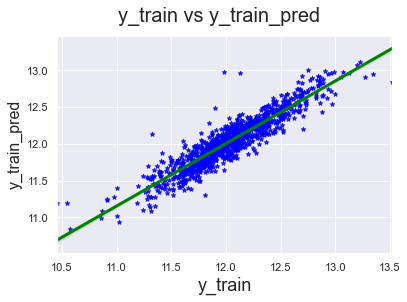

In [135]:
# Plotting graph b/w actual and predicted values with train data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

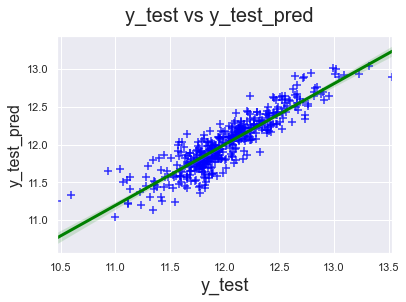

In [136]:
# Plotting graph b/w actual and predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'blue',"s": 50}, line_kws = {"color": 'green', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

### Residual Analysis

#### Residual Analysis of Train

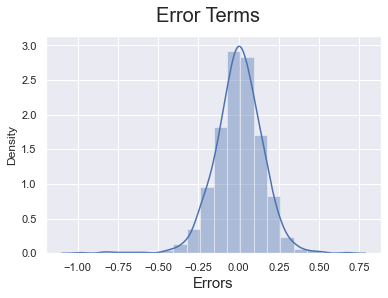

In [137]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

#### Residual Analysis of Test

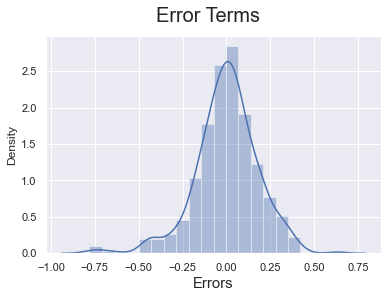

In [138]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

Observations from the regular Linear Regression:

- Train r2 score is : 0.8506607461734328
- Test r2 score is : 0.8102585749285294
- Residuals are centered around 0 and normally distributed which satisfies linear regression assumptions
- Both train and test predictions are linear in nature compared to the actual values


Now we will perform Lasso and Ridge Regression to perform regulaization which helps models perform well with unseen data while identifying necessary underlying patterns.
- In both Ridge and Lasso regression, which both allow some bias to get a significant decrease in variance, thereby pushing the model coefficients towards 0.
- In Lasso, some of these coefficients become 0, thus resulting in model selection and, hence, easier interpretation, particularly when the number of coefficients is very large.

In [139]:
df_linear = pd.DataFrame(index=X_train_rfe.columns)
df_linear.rows = X_train_rfe.columns
df_linear['Linear'] = lm.params
df_linear

,Linear
MSSubClass,-0.134959
LotArea,0.631487
OverallQual,1.051558
OverallCond,0.078300
BsmtFullBath,0.248375
TotRmsAbvGrd,0.551252
Fireplaces,0.207255
GarageCars,0.412702
EnclosedPorch,-0.045398
Age_YearRemodAdd,-0.189611


In [140]:
names = X_train_rfe.columns # 34 features
print(len(names))
print(list(names))

34
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'EnclosedPorch', 'Age_YearRemodAdd', 'MSZoning_RH', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Twnhs', 'HouseStyle_2.5Unf', 'Exterior1st_Wd Sdng', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Wd Sdng', 'BsmtQual_Fa', 'HeatingQC_Po', 'Functional_Maj2', 'Functional_Sev', 'GarageType_NA', 'GarageCond_Fa', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_Oth', 'SaleCondition_Alloca']


## Lasso Regression

In [141]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [142]:
# Get only 34 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]

In [143]:
print(X_train.shape)
print(X_test.shape)

(1021, 34)
(438, 34)


In [144]:
# list of alpha to tune
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [145]:
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [146]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002857,0.000963,0.001524,0.000680,0.0001,{'alpha': 0.0001},-0.119938,-0.124655,-0.122918,-0.118724,-0.109170,-0.119081,0.005383,1,-0.112462,-0.110692,-0.111604,-0.113598,-0.114242,-0.112520,0.001289
1,0.001769,0.000016,0.000909,0.000026,0.001,{'alpha': 0.001},-0.121829,-0.127341,-0.124936,-0.123928,-0.109723,-0.121551,0.006174,2,-0.115986,-0.114165,-0.116341,-0.118283,-0.119293,-0.116814,0.001802
2,0.001669,0.000040,0.000903,0.000016,0.01,{'alpha': 0.01},-0.143837,-0.153558,-0.166022,-0.151531,-0.131954,-0.149381,0.011256,3,-0.150626,-0.143643,-0.147394,-0.147190,-0.152803,-0.148331,0.003144
3,0.001593,0.000018,0.000887,0.000007,0.05,{'alpha': 0.05},-0.272906,-0.271670,-0.305303,-0.260831,-0.247907,-0.271723,0.019052,4,-0.270733,-0.272458,-0.265760,-0.272381,-0.275456,-0.271358,0.003187
4,0.001685,0.000037,0.000935,0.000028,0.1,{'alpha': 0.1},-0.307215,-0.307180,-0.339056,-0.295698,-0.285281,-0.306886,0.018039,5,-0.306098,-0.306334,-0.298970,-0.309393,-0.311655,-0.306490,0.004286


In [147]:
cv_results.shape


(28, 21)

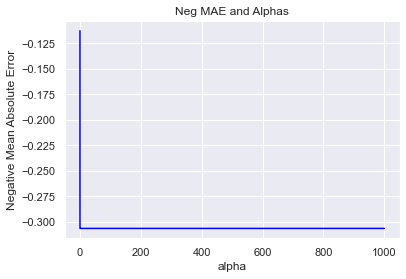

In [148]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

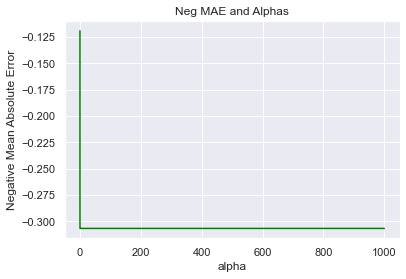

In [149]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

### Optimal Value

In [150]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

### Lasso Regression model using optimal Value

In [151]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [152]:
lasso.coef_

array([-0.13179745,  0.58198588,  1.05087735,  0.07396657,  0.25136004,
        0.54938848,  0.2098082 ,  0.41392533, -0.04478218, -0.1909636 ,
       -0.0093441 , -0.20590779,  0.1038557 ,  0.15461796,  0.0783364 ,
        0.11698923,  0.11383761,  0.08512908,  0.15450337, -0.07367676,
       -0.04552322, -0.10903612, -0.14210668,  0.0775009 , -0.03060111,
       -0.17074601, -0.30979669, -0.18291326, -0.07648592, -0.11416763,
        0.12116202,  0.01468421,  0.21459521,  0.09956535])

In [153]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
MSSubClass,-0.131797
LotArea,0.581986
OverallQual,1.050877
OverallCond,0.073967
BsmtFullBath,0.251360
TotRmsAbvGrd,0.549388
Fireplaces,0.209808
GarageCars,0.413925
EnclosedPorch,-0.044782
Age_YearRemodAdd,-0.190964


### Model Evaluation

In [154]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8502262976655928
Test r2 score is : 0.8143455993713915
Train RSS score is : 23.726301051427125
Test RSS score is : 13.795054001419729
Train MSE score is : 0.023238296818244002
Test MSE score is : 0.03149555708086696


## Ridge Regression

In [155]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [156]:
# Get only 34 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]

In [157]:
print(X_train.shape)
print(X_test.shape)

(1021, 34)
(438, 34)


In [158]:
# list of alpha to tune
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [159]:
# Applying Ridge regression with 5 fold cross validation

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [160]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002140,0.000840,0.000941,0.000039,0.0001,{'alpha': 0.0001},-0.120047,-0.124936,-0.122236,-0.119234,-0.109340,-0.119158,0.005292,11,-0.112287,-0.110513,-0.111143,-0.113061,-0.114090,-0.112219,0.001287
1,0.001988,0.000300,0.001305,0.000466,0.001,{'alpha': 0.001},-0.120048,-0.124934,-0.122235,-0.119233,-0.109340,-0.119158,0.005292,10,-0.112288,-0.110514,-0.111144,-0.113063,-0.114091,-0.112220,0.001287
2,0.002013,0.000132,0.001054,0.000061,0.01,{'alpha': 0.01},-0.120060,-0.124911,-0.122224,-0.119226,-0.109336,-0.119152,0.005288,9,-0.112297,-0.110522,-0.111156,-0.113083,-0.114102,-0.112232,0.001289
3,0.001902,0.000071,0.001004,0.000046,0.05,{'alpha': 0.05},-0.120116,-0.124816,-0.122175,-0.119205,-0.109320,-0.119126,0.005269,7,-0.112346,-0.110558,-0.111209,-0.113167,-0.114153,-0.112287,0.001297
4,0.001997,0.000281,0.000970,0.000037,0.1,{'alpha': 0.1},-0.120183,-0.124716,-0.122118,-0.119190,-0.109300,-0.119102,0.005251,6,-0.112414,-0.110600,-0.111275,-0.113267,-0.114227,-0.112357,0.001311


In [161]:
cv_results.shape

(28, 21)

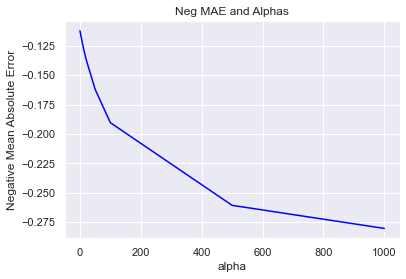

In [162]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

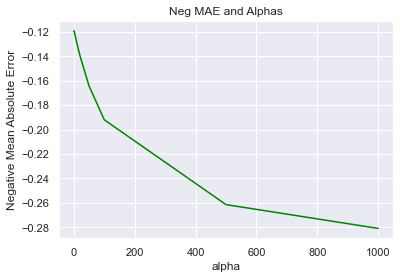

In [163]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

### Optimal Value

In [164]:
optimalvalue_ridge = model_cv.best_params_['alpha']
optimalvalue_ridge

0.4

### Ridge REgression Model using the optimal value

In [165]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.4)

In [166]:
ridge.coef_

array([-0.1329802 ,  0.52549766,  1.01998046,  0.07743119,  0.25128223,
        0.55240947,  0.21720798,  0.41643444, -0.04859629, -0.19457511,
       -0.01691404, -0.19920781,  0.11151539,  0.16483557,  0.08138665,
        0.11784342,  0.13599313,  0.09152609,  0.16115062, -0.07663475,
       -0.05159985, -0.10944432, -0.1640442 ,  0.07848859, -0.03534655,
       -0.19484939, -0.30449169, -0.20274025, -0.08084827, -0.11660185,
        0.14606313,  0.03020179,  0.22660683,  0.11052518])

In [167]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-0.132980
LotArea,0.525498
OverallQual,1.019980
OverallCond,0.077431
BsmtFullBath,0.251282
TotRmsAbvGrd,0.552409
Fireplaces,0.217208
GarageCars,0.416434
EnclosedPorch,-0.048596
Age_YearRemodAdd,-0.194575


### Model Evaluation

In [168]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8502440706300041
Test r2 score is : 0.811332870486215
Train RSS score is : 23.7234855591369
Test RSS score is : 14.018914882292613
Train MSE score is : 0.023235539235197746
Test MSE score is : 0.032006654982403224


## Comparison of co-eff and metrics after regularization

In [169]:
comparison = pd.DataFrame(index=X_train.columns)
comparison.rows = X_train.columns

comparison['Linear'] = lm.params
comparison['Ridge'] = ridge.coef_
comparison['Lasso'] = lasso.coef_

In [170]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,1.051558,1.019980,1.050877
LotArea,0.631487,0.525498,0.581986
TotRmsAbvGrd,0.551252,0.552409,0.549388
GarageCars,0.412702,0.416434,0.413925
BsmtFullBath,0.248375,0.251282,0.251360
SaleType_Oth,0.322495,0.226607,0.214595
Fireplaces,0.207255,0.217208,0.209808
LandContour_Low,0.163298,0.164836,0.154618
Neighborhood_StoneBr,0.161171,0.161151,0.154503
SaleType_Con,0.174340,0.146063,0.121162


Observations
There are 34 significant features in the model
- The features are sorted in the order of decreasing significance of the co-efficients (i.e. The most significant feature is at the top, followed by the next significant one and so on...)
- The co-efficients are closer for Ridge and Lasso Regression models post regularization with slight variance to the model created by Linear Regression
- However, the resultant selection of significant feature order still remains the same

In [171]:
# Creating a table containing all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.850661,0.850244,0.850226
1,R2 Score (Test),0.810259,0.811333,0.814346
2,RSS (Train),23.657478,23.723486,23.726301
3,RSS (Test),14.098740,14.018915,13.795054
4,MSE (Train),0.152220,0.152432,0.152441
5,MSE (Test),0.179413,0.178904,0.177470


Observations
- The R2 Score, RSS and MSE are all very closer for Linear Regression, Ridge and Lasso
- Lasso has better scores by a very slight margin compared to Ridge and Linear Regression

# Subjective Questions

## What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [172]:
print(f"The optimal value for Ridge Regression is : {optimalvalue_ridge}")
print(f"The optimal value for Lasso Regression is : {optimalvalue_lasso}")

The optimal value for Ridge Regression is : 0.4
The optimal value for Lasso Regression is : 0.0001


In [173]:
# Doubling Lasso and Ridge Regression's alpha values
optimalvalue_ridge *= 2
optimalvalue_lasso *= 2
print(f"Doubled alpha values of Ridge is {optimalvalue_ridge} and Lasso is {optimalvalue_lasso}")

Doubled alpha values of Ridge is 0.8 and Lasso is 0.0002


###  Lasso Regression when doubling the optimal Alpha

In [174]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [175]:
lasso.coef_

array([-0.12877615,  0.53241261,  1.05017763,  0.06976847,  0.25436846,
        0.54748961,  0.2123907 ,  0.41519086, -0.04425019, -0.19229953,
       -0.00377736, -0.18758532,  0.09562455,  0.14602163,  0.06982445,
        0.11332034,  0.06073944,  0.08217333,  0.14788719, -0.07310208,
       -0.03859158, -0.10325838, -0.09235105,  0.07099102, -0.02960361,
       -0.06816198, -0.28548212, -0.07888123, -0.07346966, -0.11181306,
        0.06803825,  0.        ,  0.10687524,  0.07903198])

In [176]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
MSSubClass,-0.128776
LotArea,0.532413
OverallQual,1.050178
OverallCond,0.069768
BsmtFullBath,0.254368
TotRmsAbvGrd,0.547490
Fireplaces,0.212391
GarageCars,0.415191
EnclosedPorch,-0.044250
Age_YearRemodAdd,-0.192300


In [177]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_double_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8489322247142216
Test r2 score is : 0.8174006771009458
Train RSS score is : 23.931300753966283
Test RSS score is : 13.568046388807065
Train MSE score is : 0.02343908007244494
Test MSE score is : 0.030977274860290102


### Ridge Regression when doubling the optimal Alpha

In [178]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.8)

In [179]:
ridge.coef_

array([-0.13116113,  0.45233253,  0.99154076,  0.07616744,  0.25181418,
        0.55049145,  0.22542896,  0.41952902, -0.05018741, -0.1992395 ,
       -0.01840359, -0.18017259,  0.11004291,  0.16354034,  0.07637039,
        0.11561281,  0.11406744,  0.0946945 ,  0.16120012, -0.07839166,
       -0.05073207, -0.10514782, -0.1444958 ,  0.07384294, -0.03850084,
       -0.15170111, -0.2801681 , -0.1566925 , -0.08263312, -0.11635006,
        0.12609957,  0.0281015 ,  0.17469063,  0.10282159])

In [180]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-0.131161
LotArea,0.452333
OverallQual,0.991541
OverallCond,0.076167
BsmtFullBath,0.251814
TotRmsAbvGrd,0.550491
Fireplaces,0.225429
GarageCars,0.419529
EnclosedPorch,-0.050187
Age_YearRemodAdd,-0.199239


In [181]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_double_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_r.append(mse_test_lr**0.5)

Train r2 score is : 0.849438003226233
Test r2 score is : 0.8112624887180021
Train RSS score is : 23.851178188694234
Test RSS score is : 14.024144601006117
Train MSE score is : 0.023360605473745577
Test MSE score is : 0.03201859497946602


### Comparison of co-eff and metrics of Lasso and Ridge

In [182]:
comparison['Ridge_Double'] = ridge.coef_
comparison['Lasso_Double'] = lasso.coef_
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,1.051558,1.019980,1.050877,0.991541,1.050178
LotArea,0.631487,0.525498,0.581986,0.452333,0.532413
TotRmsAbvGrd,0.551252,0.552409,0.549388,0.550491,0.547490
GarageCars,0.412702,0.416434,0.413925,0.419529,0.415191
BsmtFullBath,0.248375,0.251282,0.251360,0.251814,0.254368
SaleType_Oth,0.322495,0.226607,0.214595,0.174691,0.106875
Fireplaces,0.207255,0.217208,0.209808,0.225429,0.212391
LandContour_Low,0.163298,0.164836,0.154618,0.163540,0.146022
Neighborhood_StoneBr,0.161171,0.161151,0.154503,0.161200,0.147887
SaleType_Con,0.174340,0.146063,0.121162,0.126100,0.068038


In [183]:
rg_metric = pd.Series(metric_double_r, name = 'Double Ridge Regression')
ls_metric = pd.Series(metric_double_l, name = 'Double Lasso Regression')

final_metric = pd.concat([final_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),0.850661,0.850244,0.850226,0.849438,0.848932
1,R2 Score (Test),0.810259,0.811333,0.814346,0.811262,0.817401
2,RSS (Train),23.657478,23.723486,23.726301,23.851178,23.931301
3,RSS (Test),14.098740,14.018915,13.795054,14.024145,13.568046
4,MSE (Train),0.152220,0.152432,0.152441,0.152842,0.153098
5,MSE (Test),0.179413,0.178904,0.177470,0.178937,0.176004


After doubling the optimal alpha/lambda values for both Ridge and Lasso Regression, we don't see any significant changes in both metrics and the features except very minor variations here and there but overall very similar.

## You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

The values of R2 Score, RSS and MSE for Lasso Regression are better than Ridge Regression in this particular model.
In Lasso Regression, we can push the model co-efficients to actual zero value. This means that the features that have co-efficent value of 0 can be removed from the model. This results in feature selection.
Model complexity also reduces because we can remove features with zero co-efficients.

Thus,it is better to apply Lasso regression over ridge

## After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. 
You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [184]:
comparison.sort_values(by='Lasso',ascending=False).head()

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,1.051558,1.019980,1.050877,0.991541,1.050178
LotArea,0.631487,0.525498,0.581986,0.452333,0.532413
TotRmsAbvGrd,0.551252,0.552409,0.549388,0.550491,0.547490
GarageCars,0.412702,0.416434,0.413925,0.419529,0.415191
BsmtFullBath,0.248375,0.251282,0.251360,0.251814,0.254368


In [185]:
comparison.sort_values(by='Lasso',ascending=False).Lasso.head(5)

OverallQual     1.050877
LotArea         0.581986
TotRmsAbvGrd    0.549388
GarageCars      0.413925
BsmtFullBath    0.251360
Name: Lasso, dtype: float64

In [186]:
top5_names = list(comparison['Lasso'].sort_values(ascending=False).head(5).index)
top5_names

['OverallQual', 'LotArea', 'TotRmsAbvGrd', 'GarageCars', 'BsmtFullBath']

In [187]:
# Drop the top 5 important predictor variables from X_train and X_test
X_train = X_train.drop(top5_names, axis=1)
X_test = X_test.drop(top5_names, axis=1)

In [188]:
print(X_train.shape)
print(X_test.shape)

(1021, 29)
(438, 29)


In [189]:
# list of alphas to tune
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [190]:
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [191]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002210,0.000523,0.000935,0.000054,0.0001,{'alpha': 0.0001},-0.190117,-0.187784,-0.206522,-0.192197,-0.181674,-0.191659,0.008226,2,-0.180889,-0.181387,-0.176737,-0.180958,-0.182359,-0.180466,0.001937
1,0.001707,0.000063,0.000897,0.000009,0.001,{'alpha': 0.001},-0.192426,-0.186670,-0.200627,-0.187901,-0.180065,-0.189538,0.006811,1,-0.182206,-0.183251,-0.179527,-0.183609,-0.185339,-0.182787,0.001917
2,0.001626,0.000067,0.000898,0.000019,0.01,{'alpha': 0.01},-0.205097,-0.193467,-0.227478,-0.205254,-0.190700,-0.204399,0.012969,3,-0.201105,-0.205454,-0.200915,-0.202169,-0.204534,-0.202835,0.001837
3,0.001511,0.000019,0.000857,0.000007,0.05,{'alpha': 0.05},-0.272906,-0.271670,-0.305303,-0.260831,-0.247907,-0.271723,0.019052,4,-0.270733,-0.272458,-0.265760,-0.272381,-0.275456,-0.271358,0.003187
4,0.001520,0.000019,0.000874,0.000026,0.1,{'alpha': 0.1},-0.307215,-0.307180,-0.339056,-0.295698,-0.285281,-0.306886,0.018039,5,-0.306098,-0.306334,-0.298970,-0.309393,-0.311655,-0.306490,0.004286


In [192]:
cv_results.shape

(28, 21)

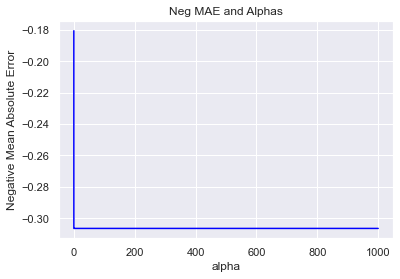

In [193]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

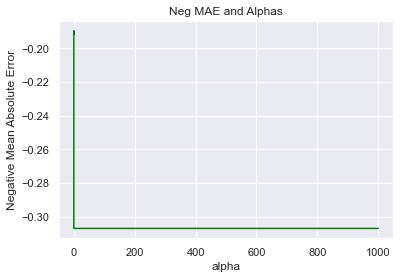

In [194]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

In [195]:
optimalvalue_lasso = model_cv.best_params_['alpha'] #getting optimal value
optimalvalue_lasso

0.001

In [196]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [197]:
lasso.coef_

array([-0.08199283, -0.04550686,  0.61577836, -0.        , -0.50271828,
       -0.        , -0.        ,  0.12210979,  0.0719457 , -0.        ,
        0.05512996,  0.        ,  0.29827267,  0.30584574, -0.15302148,
       -0.        , -0.05952948, -0.        , -0.        , -0.06317508,
       -0.        , -0.26253777, -0.        , -0.36990074, -0.10501   ,
        0.        ,  0.        ,  0.        ,  0.02783889])

In [198]:
# Lasso Co-eff

df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_

In [199]:
# New Pred features top 5
df_lasso.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
Fireplaces,0.615778
Neighborhood_StoneBr,0.305846
Neighborhood_NridgHt,0.298273
LandContour_HLS,0.122110
LandContour_Low,0.071946


## How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

A robust and generalized model is a one that has just enough features with low variance as possible.
This means the model has to be less complex and any unprecendented change in one or more features does not significantly alter the value of the predicted variable. 

The OLS (Ordinary least squares) regression model is very sensitive to outliers and they induce high variance.
In order to reduce this we can make use of Ridge and Lasso regularization that include a penalty term in the Cost function of the model.


The Penalty term will move the co-eff towards zero and this reduces the model complexity,in turn reducing the overfitting.

So Reguarization will help us to build a model with high variance with a small trade off in bias. Thus it helps us build a model which is robust and generalizable along with with good, consistent train as well as test accuracy. 